<a href="https://colab.research.google.com/github/safal415/AI-lab-goalbased_vacumn_cleaning_agent/blob/main/goalbasedvacumncleaningagent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Room State:


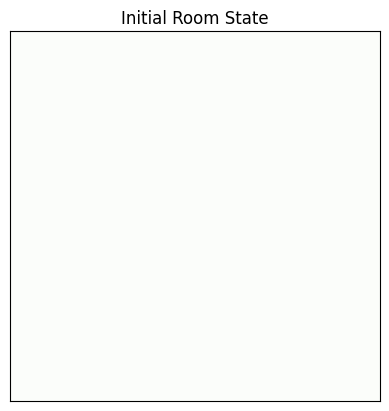

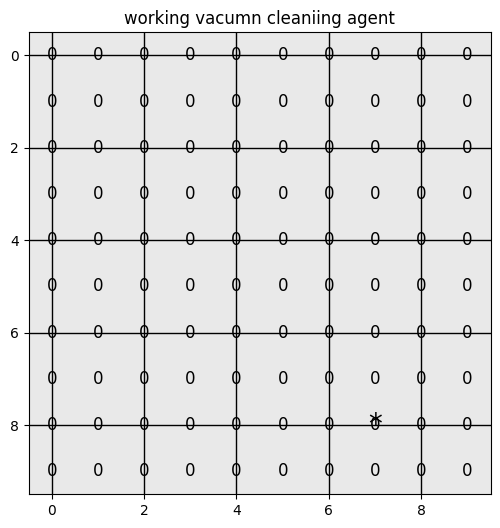

Final Room State:


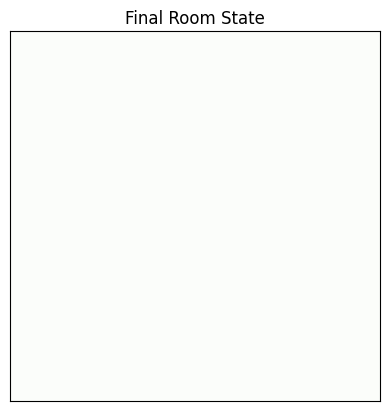

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Constants
CLEAN = 0
DIRTY = 1
VACUUM = '*'
GRID_SIZE = 10

# Createing foom of 10*10 tiles
def create_room(size):
    room = np.random.choice([CLEAN, DIRTY], size=(size, size), p=[0.7, 0.3])  # 70% clean, 30% dirty
    return room

def clean_room(room):
    size = room.shape[0]
    vacuum_pos = (random.randint(0, size - 1), random.randint(0, size - 1))  # Random initial position
    movements = []  # To store the movement history

    while True:

        if room[vacuum_pos] == DIRTY:
            room[vacuum_pos] = CLEAN

        # Check if the room is clean
        if np.all(room == CLEAN):
            break

        # Record the current vacuum position
        movements.append(vacuum_pos)

        # Move the vacuum cleaner: in 4 direction
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
        random.shuffle(directions)

        for direction in directions:
            new_pos = (vacuum_pos[0] + direction[0], vacuum_pos[1] + direction[1])
            # Check if new position is within bounds
            if 0 <= new_pos[0] < size and 0 <= new_pos[1] < size:
                vacuum_pos = new_pos
                break

    # Append the last position (when the room is clean)
    movements.append(vacuum_pos)
    return movements

# Function to animate the vacuum cleaner's movement
def animate_vacuum(movements, room):
    fig, ax = plt.subplots(figsize=(6, 6))
    cmap = plt.cm.colors.ListedColormap(['lightgray', 'brown'])

    # Initial display
    ax.imshow(room == CLEAN, cmap=cmap, alpha=0.5)

    # Add grid lines
    ax.grid(color='black', linestyle='-', linewidth=1)

    # Annotate the grid with dirt and clean values
    for (i, j), value in np.ndenumerate(room):
        ax.text(j, i, value, ha='center', va='center', fontsize=12, color='black')

    # Set the limits
    ax.set_xlim(-0.5, GRID_SIZE - 0.5)
    ax.set_ylim(GRID_SIZE - 0.5, -0.5)

    # Initialize vacuum position
    vacuum_text = ax.text(-1, -1, VACUUM, ha='center', va='center', fontsize=20, color='black')

    def update(frame):
        # Update vacuum position
        vacuum_pos = movements[frame]
        vacuum_text.set_position((vacuum_pos[1], vacuum_pos[0]))
        return vacuum_text,

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(movements), interval=500, blit=True)
    plt.title("working vacumn cleaniing agent")
    plt.show()

# Main execution
room = create_room(GRID_SIZE)
print("Initial Room State:")
display_grid = room.copy().astype(str)
display_grid[0, 0] = VACUUM  # Initial vacuum position for display
plt.imshow(display_grid == CLEAN, cmap='Greens', alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.title("Initial Room State")
plt.show()

movements = clean_room(room)
animate_vacuum(movements, room)

print("Final Room State:")
display_grid = room.copy().astype(str)
plt.imshow(display_grid == CLEAN, cmap='Greens', alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.title("Final Room State")
plt.show()
